# HR Employee Attrition
- By Valentine Ezenwanne


## Project Objective

The objectives of this project include
- To build and deploy a machine learning model to predict employee attrition

## Dataset Description
The dataset was provided by MeriSkill


## Import the packages

In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
#display few lines
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# Data Wrangling

In [4]:
#Understanding the shape
df.shape

(1470, 35)

- The dataset contain 1,470 records and 35 columns

In [5]:
#checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#counting the categorical variables
df.select_dtypes(include='object').any().sum()

9

- There are nine(9) categorical variables

In [7]:
#counting the numerical variables
df.select_dtypes(include=['int64', 'float64']).any().sum()

26

- There are 26 numerical variables

In [8]:
#checking for missing values
df.isna().sum().sum()

0

- There are no missing values

In [9]:
#checking for duplicates
df.duplicated().sum()

0

- There are no duplicates

### Checking for unique values in the Categorical variables

In [10]:
#checking for unique values in Attrition
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
#checking for unique values in BusinessTravel
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [12]:
#checking for unique values in Department
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [13]:
#checking for unique values in EducationField
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [14]:
#checking for unique values in Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
#checking for unique values in JobRole
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [16]:
#checking for unique values in MaritalStatus
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [17]:
#checking for unique values in Over18
df['Over18'].unique()

array(['Y'], dtype=object)

- There is only one unique value in Over18, Y. The columns has to be dropped

In [18]:
#dropping the over18 column
df.drop('Over18', axis=1, inplace=True)

In [19]:
#checking for unique values in OverTime
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
#checking for unique values in EmployeeCount
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

- There is only one value in the column, it has to be dropped

In [21]:
#dropping the EmployeeCount column
df.drop('EmployeeCount', axis=1, inplace=True)

In [22]:
#checking for values in StandardHours
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

- There is only one value in the column, it has to be dropped

In [23]:
#dropping the StandardHours column
df.drop('StandardHours', axis=1, inplace=True)

In [24]:
#checking for values in EmployeeNumber
df['EmployeeNumber'].nunique()

1470

In [25]:
#dropping the EmployeeNumber column
df.drop('EmployeeNumber', axis=1, inplace=True)

# Data Preprocessing

### Mapping the Categorical variables to integer

In [26]:
#map the target variable(Attrition) to integer

map_dict = {
    'Yes': 1,
    'No': 0
}

df['Attrition'] = df['Attrition'].map(map_dict)

In [27]:
#confirm the Attrition has been mapped
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [28]:
#map the BusinessTravel to integer

map_dict1 = {
    'Travel_Rarely': 1,
    'Travel_Frequently': 2,
    'Non-Travel': 3
    
}

df['BusinessTravel'] = df['BusinessTravel'].map(map_dict1)

In [29]:
#confirm the BusinessTravel has been mapped
df['BusinessTravel'].value_counts()

1    1043
2     277
3     150
Name: BusinessTravel, dtype: int64

In [30]:
#map the Department to integer
map_dict2 = {
    'Sales': 1,
    'Research & Development': 2,
    'Human Resources': 3
    
}

df['Department'] = df['Department'].map(map_dict2)

In [31]:
#confirm the Department has been mapped
df['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [32]:
#map the Gender to integer

map_dict3 = {
    'Female': 1,
    'Male': 0
}

df['Gender'] = df['Gender'].map(map_dict3)

In [33]:
#confirm the Gender has been mapped
df['Gender'].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [34]:
#map the Marital Status to integer
map_dict4 = {
    'Single': 1,
    'Married': 2,
    'Divorced': 3
    
}

df['MaritalStatus'] = df['MaritalStatus'].map(map_dict4)

In [35]:
#confirm the Marital Status has been mapped
df['MaritalStatus'].value_counts()

2    673
1    470
3    327
Name: MaritalStatus, dtype: int64

In [36]:
#map Over Time to integer
map_dict5 = {
    'Yes': 1,
    'No': 0
}

df['OverTime'] = df['OverTime'].map(map_dict5)

In [37]:
#confirm the Over Time has been mapped
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [38]:
#map the Education Field to integer
map_dict6 = {
    'Life Sciences': 1,
    'Medical': 2,
    'Marketing': 3,
    'Technical Degree': 4,
    'Human Resources': 5,
    'Other': 6
    
}

df['EducationField'] = df['EducationField'].map(map_dict6)

In [39]:
#confirm the Education Field has been mapped
df['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [40]:
#map the Job Roles to integer
map_dict7 = {
    'Sales Executive': 1,
    'Research Scientist': 2,
    'Laboratory Technician': 3,
    'Manufacturing Director': 4,
    'Healthcare Representative': 5,
    'Manager': 6,
    'Sales Representative': 7,
    'Research Director': 8,
    'Human Resources': 9
    
}

df['JobRole'] = df['JobRole'].map(map_dict7)

In [41]:
#confirm the Job role has been mapped
df['JobRole'].value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

In [42]:
#display few lines 
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,2,1,94,3,2,1,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,3,0,61,2,2,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7


- Every Categorical features has been mapped to integers

## Import the packages

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2

## Feature Selection

### Select the input and target for Feature Selection

In [53]:
#select the input features
XX = df.drop('Attrition', axis=1)

#select the target features
yy = df['Attrition']

### Selecting best Features using SelectKBest

In [54]:
#instantiate the SelectKBest with k = 15
best_feat = SelectKBest(score_func=chi2, k=15)

In [55]:
# #select the best features
select = best_feat.fit(XX, yy)

In [56]:
#get the best features names
select.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [58]:
scores = pd.Series(select.scores_)
features = pd.Series(XX.columns)
b_feat = pd.concat([features, scores], axis=1)
b_feat.columns = ['features', 'scores']
best_features = b_feat.sort_values(['scores'], ascending=False).head(15)
best_features

,features,scores
15,MonthlyIncome,127922.293694
16,MonthlyRate,1196.633553
2,DailyRate,956.580494
23,TotalWorkingYears,230.721618
26,YearsAtCompany,142.100054
27,YearsInCurrentRole,117.522596
29,YearsWithCurrManager,110.671534
0,Age,84.155277
18,OverTime,63.845067
4,DistanceFromHome,63.772142


### Select the input features for Model building using best features

In [59]:
list(best_features['features'].values)

['MonthlyIncome',
 'MonthlyRate',
 'DailyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Age',
 'OverTime',
 'DistanceFromHome',
 'StockOptionLevel',
 'JobLevel',
 'MaritalStatus',
 'YearsSinceLastPromotion',
 'JobSatisfaction']

In [65]:
#selecting the input features
X = df[['Age', 'MaritalStatus', 'JobLevel', 'StockOptionLevel', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany', 
        'YearsInCurrentRole', 'YearsWithCurrManager', 'OverTime', 'YearsSinceLastPromotion', 'JobSatisfaction']]

#selecting the target features
y = df['Attrition']

### Split the dataset

In [66]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Initialize the StandardScaler
scaler = StandardScaler()

In [68]:
#fit and transform the X_train
X_train = scaler.fit_transform(X_train)

In [69]:
#transform the X_test
X_test = scaler.transform(X_test)

# Model Building

In [70]:
#define the models to use

models = {
    'LogisticRegression': {
        'model': LogisticRegression()
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier()
    },
    
    'RandomForest': {
        'model': RandomForestClassifier()
    },
    
    'SVC': {
        'model': SVC()
    },
    
    'KNN': {
        'model': KNN()
    },
    
    'xgboost': {
        'model': XGBClassifier()
    },
    
    'NaiveBayes': {
        'model': GaussianNB()
    }
}

In [71]:
### Create a function to take each model and return accuracy score, precision score, recall score and f1_score

def model_score(models, X_train, X_test, y_train, y_test):
    '''
    This function takes the models, X_train, X_test, y_train, y_test and returns the accuracy score
    precision score, recall score and f1_score
    '''
    
    score_params = []
    
    #create a for loop to loop through the models
    for model_name, mod in models.items():
        #instantiate the model
        model = mod['model']
        
        #fit the model
        model.fit(X_train, y_train)
        
        #predict the x_test
        y_pred = model.predict(X_test)
        
        #check accuracy, precision, recall, f1_score
        a_score = accuracy_score(y_test, y_pred)
        p_score = precision_score(y_test, y_pred)
        r_score = recall_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        
        #append these scores to score_params
        score_params.append({
            'model_name': model_name,
            'accuracy_score': a_score.round(2),
            'precision_score': p_score.round(2),
            'recall_score': r_score.round(2),
            'f1_score': f_score.round(2)
        })
    return score_params

In [72]:
#call the function
model_scores = model_score(models, X_train, X_test, y_train, y_test)

In [73]:
#convert the model_scores to dataframe
model_score_data = pd.DataFrame(model_scores)
model_score_data

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.87,0.60,0.15,0.24
1,DecisionTree,0.80,0.29,0.33,0.31
2,RandomForest,0.86,0.40,0.10,0.16
3,SVC,0.87,0.67,0.10,0.18
4,KNN,0.87,0.50,0.23,0.32
5,xgboost,0.84,0.32,0.15,0.21
6,NaiveBayes,0.78,0.30,0.46,0.36


### Plotting a Bar Chart of the accuracy score

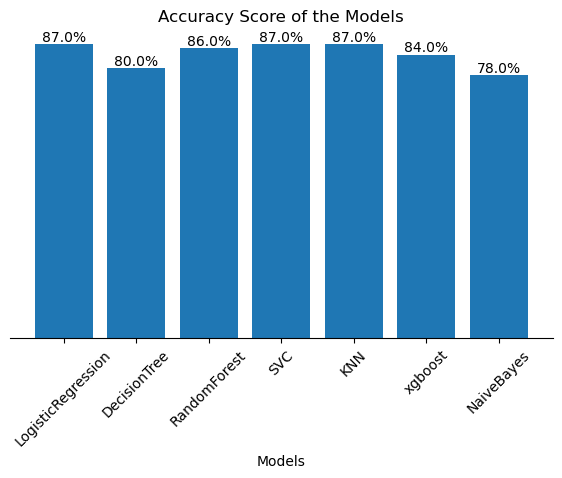

In [74]:
fig, ax = plt.subplots(figsize=[7,4])
ax.bar(data=model_score_data, x='model_name', height='accuracy_score')

ax.set_title('Accuracy Score of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_tick_params(rotation=45)

for index, values in enumerate(model_score_data['accuracy_score']):
    ax.annotate(str(values*100)+'%', xy=(index, values+0.02), ha='center', va='center')

    
plt.show()

- From the baseline model, LogisticRegression, SVC and KNN are the top three models with an accuracy of 87%

# Model Evaluation

### create a function for model evalution

In [75]:
#define a function for model evaluation

def model_eval(models, X_train, y_train, k):
    '''
    This function takes the model, training dataset and the number of cross validation and 
    return the mean and standard deviation of the cross val score
    '''
    
    #define an empty list
    score_param = []
    
    #create a for loop
    for model_name, mod in models.items():
        model = mod['model']
        score_cv = cross_val_score(model, X_train, y_train, cv=k)
        score_cv_mean = score_cv.mean().round(2)
        score_cv_std = score_cv.std().round(2)
        
        score_param.append({
            'model_name': model_name,
            'cv_score_mean': score_cv_mean,
            'cv_score_std': score_cv_std
        })
    return score_param

In [76]:
#call the model evaluation function
cross_val = model_eval(models, X, y, 5)

In [77]:
#convert the cross val scores to dataframe
cross_val_data = pd.DataFrame(cross_val)
cross_val_data

,model_name,cv_score_mean,cv_score_std
0,LogisticRegression,0.84,0.00
1,DecisionTree,0.78,0.03
2,RandomForest,0.85,0.01
3,SVC,0.84,0.00
4,KNN,0.83,0.01
5,xgboost,0.85,0.01
6,NaiveBayes,0.77,0.02


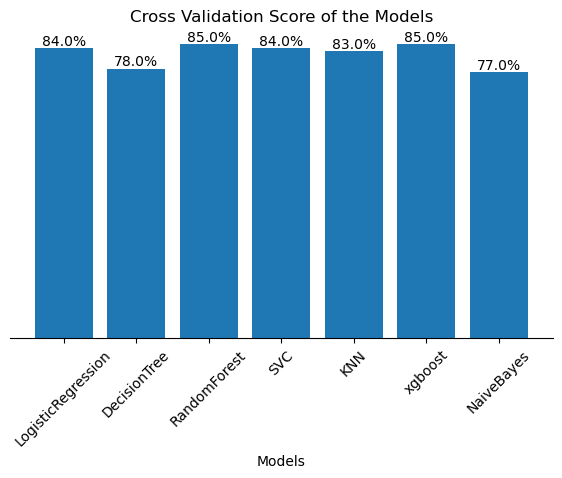

In [78]:
fig, ax = plt.subplots(figsize=[7,4])
ax.bar(data=cross_val_data, x='model_name', height='cv_score_mean')

ax.set_title('Cross Validation Score of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_tick_params(rotation=45)

for index, values in enumerate(cross_val_data['cv_score_mean']):
    ax.annotate(str(values*100)+'%', xy=(index, values+0.02), ha='center', va='center')

    
plt.show()

- From the cross validation, RandomForestClassifier and XGBoost perform better with 85% 

# Hyperparameter Tuning

In [79]:
#specify the hyperparameter grid and model
param_models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'multi_class': ['ovr'],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.01, 0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 11, 1),
            'max_features': ['sqrt', 'log2']
            
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 11, 1),
            'max_features': ['sqrt', 'log2'],
            'n_estimators': np.arange(20, 210, 10)
            
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    'KNN': {
        'model':KNN(),
        'params': {
            'n_neighbors': np.arange(2, 11, 1)
        }
    },
    
    'XGBOOST': {
        'model':XGBClassifier(),
        'params': {
            'n_estimators': np.arange(20, 210, 10),
            'learning_rate': [0.1, 0.01, 0.001]
        }
    }
}

In [80]:
# create a for loop to perform hyperparameter tunning
grid_score = []
for model_name, mp in param_models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    grid_score.append({
        'model_name': model_name,
        'best_score': grid_search.best_score_,
        'best_parameter': grid_search.best_params_
    })

In [81]:
grid_score

[{'model_name': 'LogisticRegression',
  'best_score': 0.8537396321673277,
  'best_parameter': {'multi_class': 'ovr', 'solver': 'liblinear'}},
 {'model_name': 'SVM',
  'best_score': 0.8571438874864767,
  'best_parameter': {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}},
 {'model_name': 'DecisionTree',
  'best_score': 0.8443743238369995,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 4,
   'max_features': 'sqrt'}},
 {'model_name': 'RandomForest',
  'best_score': 0.862243058059863,
  'best_parameter': {'criterion': 'entropy',
   'max_depth': 8,
   'max_features': 'sqrt',
   'n_estimators': 130}},
 {'model_name': 'NaiveBayes',
  'best_score': 0.8588351965380454,
  'best_parameter': {'var_smoothing': 1.0}},
 {'model_name': 'KNN',
  'best_score': 0.8511972592859719,
  'best_parameter': {'n_neighbors': 10}},
 {'model_name': 'XGBOOST',
  'best_score': 0.8494951316263973,
  'best_parameter': {'learning_rate': 0.01, 'n_estimators': 130}}]

In [82]:
#convert the grid score to dataframe
grid_data = pd.DataFrame(grid_score)
grid_data

,model_name,best_score,best_parameter
0,LogisticRegression,0.853740,"{'multi_class': 'ovr', 'solver': 'liblinear'}"
1,SVM,0.857144,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
2,DecisionTree,0.844374,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
3,RandomForest,0.862243,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
4,NaiveBayes,0.858835,{'var_smoothing': 1.0}
5,KNN,0.851197,{'n_neighbors': 10}
6,XGBOOST,0.849495,"{'learning_rate': 0.01, 'n_estimators': 130}"


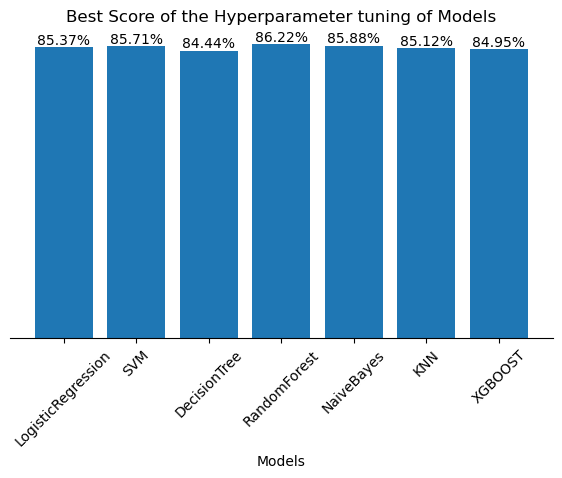

In [83]:
#plot a bar chart of the grid score
fig, ax = plt.subplots(figsize=[7,4])
ax.bar(data=grid_data, x='model_name', height='best_score')

ax.set_title('Best Score of the Hyperparameter tuning of Models')
ax.set_xlabel('Models')
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_tick_params(rotation=45)

for index, values in enumerate(grid_data['best_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), ha='center', va='center')

    
plt.show()

- The best model is Random Forest Classifier

## Random Forest (with best parameter)

In [84]:
#instantiate the best model with its parameter
model = RandomForestClassifier(n_estimators=130, criterion='entropy', max_depth=8, max_features='sqrt')

In [85]:
#fit the model 
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=130)

In [86]:
#predict the y_test
y_pred_model = model.predict(X_test)

In [87]:
#print the accuracy score
print(accuracy_score(y_test, y_pred_model))

0.8707482993197279


### Confusion Matrix

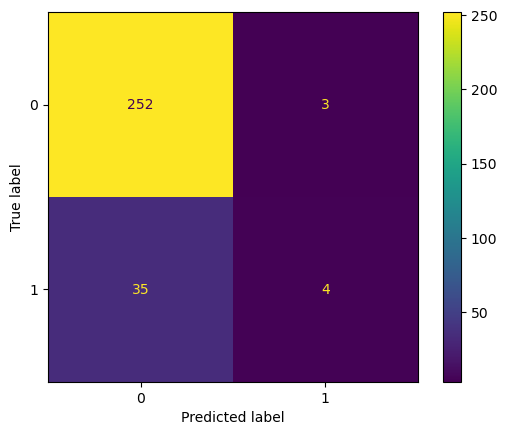

In [88]:
#display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_model)

### ROC Curve

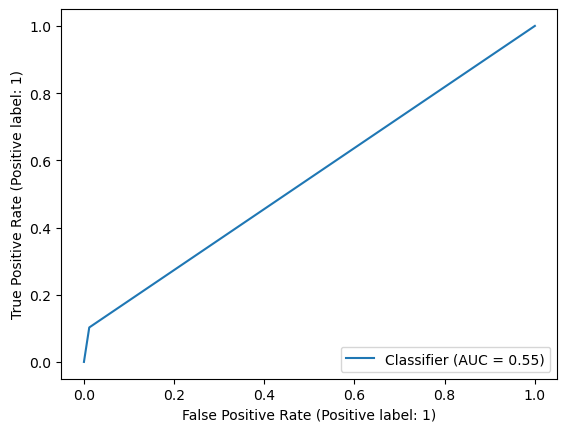

In [89]:
#display the ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_model)

## Saving the model

In [90]:
#import the module pickle
import pickle

In [91]:
#saved the model
pickle.dump(model, open('model.pkl', 'wb'))

In [92]:
#save the scaler preprocessor
pickle.dump(scaler, open('scaler.pickle', 'wb'))